In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Implementing Linear Regression algo

In [2]:
# Define the Linear Regression class
class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        num_samples, num_features = X.shape
        
        # Initialize weights and bias to zeros
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        # Gradient descent
        for _ in range(self.num_iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            
            # Calculate gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
        
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

## Reading data from local machine

In [3]:
# Load the Iris dataset from a CSV file
df = pd.read_csv('Medical Price Dataset.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Preprocessing

In [5]:
# Preprocessing and feature selection

# Convert string columns to numeric values
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df['region'] = df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

In [6]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('charges', axis=1).values
y = df['charges'].values

## Normalization

In [7]:
# Normalize the features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [8]:
# Split the data into training and testing sets
split_ratio = 0.8  # 80% training, 20% testing
split_index = int(split_ratio * len(X))

In [9]:
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]


In [10]:
X_train

array([[-1.43876426,  1.0105187 , -0.45332   , -0.90861367,  1.97058663,
        -1.34390459],
       [-1.50996545, -0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
        -0.43849455],
       [-0.79795355, -0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
        -0.43849455],
       ...,
       [-0.01474046, -0.98959079,  1.9671563 , -0.90861367, -0.5074631 ,
         1.37232554],
       [ 1.69408811, -0.98959079, -1.47695756, -0.07876719, -0.5074631 ,
         0.46691549],
       [ 1.0532774 ,  1.0105187 ,  0.20285792, -0.07876719, -0.5074631 ,
        -0.43849455]])

In [11]:
y_train

array([16884.924  ,  1725.5523 ,  4449.462  , ...,  5757.41345,
       14349.8544 , 10928.849  ])

In [12]:
X_test

array([[-0.15714284, -0.98959079,  1.05096788, -0.07876719,  1.97058663,
        -0.43849455],
       [ 1.69408811, -0.98959079,  0.12821768, -0.90861367, -0.5074631 ,
         1.37232554],
       [-1.29636188, -0.98959079,  0.09704923, -0.90861367, -0.5074631 ,
         0.46691549],
       ...,
       [-1.50996545,  1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
        -0.43849455],
       [-1.29636188,  1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
        -1.34390459],
       [ 1.55168573,  1.0105187 , -0.26138796, -0.90861367,  1.97058663,
         0.46691549]])

In [13]:
y_test

array([39871.7043 , 13974.45555,  1909.52745, 12096.6512 , 13204.28565,
        4562.8421 ,  8551.347  ,  2102.2647 , 34672.1472 , 15161.5344 ,
       11884.04858,  4454.40265,  5855.9025 ,  4076.497  , 15019.76005,
       19023.26   , 10796.35025, 11353.2276 ,  9748.9106 , 10577.087  ,
       41676.0811 , 11286.5387 ,  3591.48   , 33907.548  , 11299.343  ,
        4561.1885 , 44641.1974 ,  1674.6323 , 23045.56616,  3227.1211 ,
       16776.30405, 11253.421  ,  3471.4096 , 11363.2832 , 20420.60465,
       10338.9316 ,  8988.15875, 10493.9458 ,  2904.088  ,  8605.3615 ,
       11512.405  , 41949.2441 , 24180.9335 ,  5312.16985,  2396.0959 ,
       10807.4863 ,  9222.4026 , 36124.5737 , 38282.7495 ,  5693.4305 ,
       34166.273  ,  8347.1643 , 46661.4424 , 18903.49141, 40904.1995 ,
       14254.6082 , 10214.636  ,  5836.5204 , 14358.36437,  1728.897  ,
        8582.3023 ,  3693.428  , 20709.02034,  9991.03765, 19673.33573,
       11085.5868 ,  7623.518  ,  3176.2877 ,  3704.3545 , 36898

## Training the Model

In [14]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test)

## Model Evaluation

In [16]:
# Evaluate the model
mse = np.mean((y_pred - y_test) ** 2)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 6102.478592008161


## Visualization: Line plot of the actual output vs. predicted output

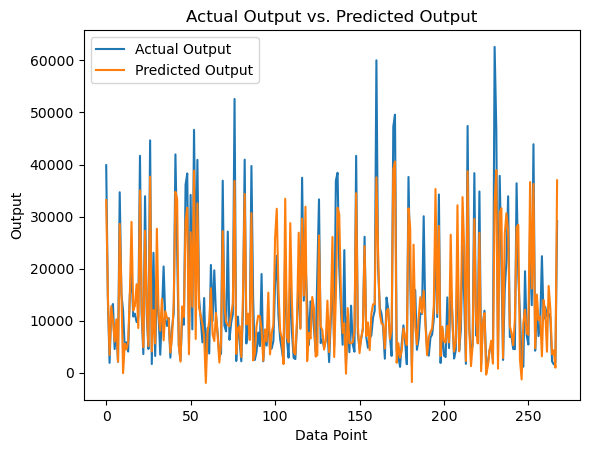

In [17]:
# Line plot of actual output vs. predicted output
plt.plot(y_test, label='Actual Output')
plt.plot(y_pred, label='Predicted Output')
plt.xlabel('Data Point')
plt.ylabel('Output')
plt.title('Actual Output vs. Predicted Output')
plt.legend()
plt.show()

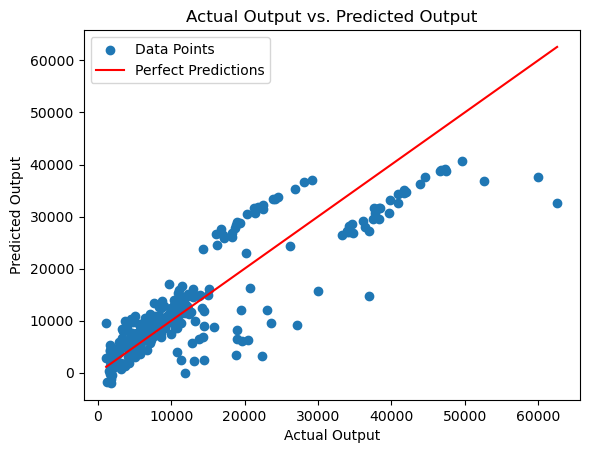

In [18]:
# Scatter plot with line of perfect predictions
plt.scatter(y_test, y_pred, label='Data Points')
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red', label='Perfect Predictions')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual Output vs. Predicted Output')
plt.legend()
plt.show()

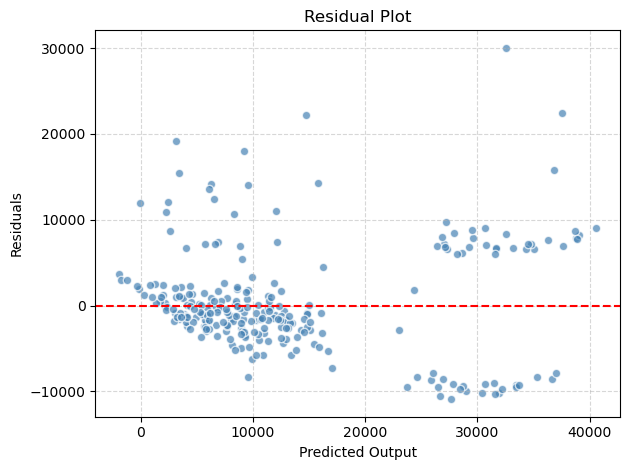

In [19]:
# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='steelblue', alpha=0.7, marker='o', edgecolors='white')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Output')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

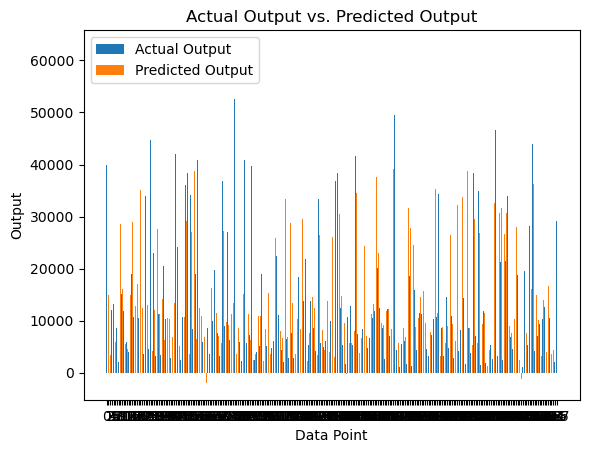

In [20]:

# Visualization
# Bar plot of actual output vs. predicted output
indices = np.arange(len(y_test))
width = 0.35

fig, ax = plt.subplots()
actual_bars = ax.bar(indices, y_test, width, label='Actual Output')
predicted_bars = ax.bar(indices + width, y_pred, width, label='Predicted Output')

ax.set_xlabel('Data Point')
ax.set_ylabel('Output')
ax.set_title('Actual Output vs. Predicted Output')
ax.set_xticks(indices + width / 2)
ax.set_xticklabels(indices)
ax.legend()

plt.show()